In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-12 12:21:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.217.194.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  84.7MB/s    in 1.7s    

2020-07-12 12:21:56 (84.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')

train_human_dir=os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

['horse34-8.png', 'horse40-2.png', 'horse38-7.png', 'horse31-3.png', 'horse14-1.png', 'horse21-6.png', 'horse02-5.png', 'horse35-4.png', 'horse35-8.png', 'horse40-4.png']
['human16-30.png', 'human09-01.png', 'human03-26.png', 'human11-05.png', 'human16-12.png', 'human13-10.png', 'human04-01.png', 'human07-13.png', 'human01-07.png', 'human16-03.png']


In [5]:
print('total training horse images:',len(os.listdir(train_horse_dir)))
print('total training human images:',len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

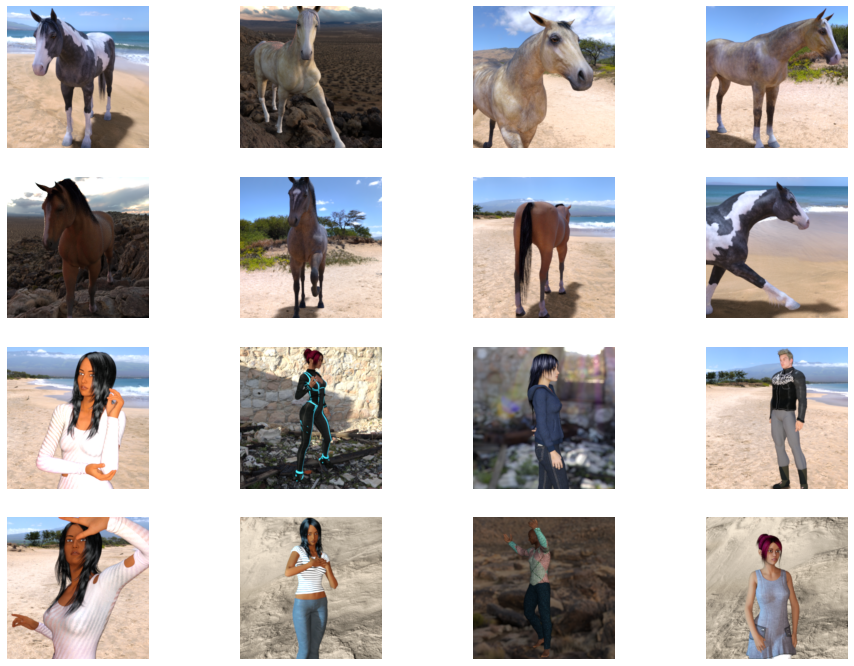

In [7]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*3)
pic_index+=8

next_horse_pic=[os.path.join(train_horse_dir,fname)for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pic=[os.path.join(train_human_dir,fname)for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pic + next_human_pic):
  subp=plt.subplot(nrows,ncols,i+1)
  subp.axis('Off')
  img=mpimg.imread(img_path)

  plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),                                                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1/255)

train_generator=train_data.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
history=model.fit(train_generator,epochs=20,steps_per_epoch=8)

Epoch 1/20
8/8 [==============================] - 6s 705ms/step - loss: 0.5193 - accuracy: 0.7061
Epoch 2/20
8/8 [==============================] - 6s 693ms/step - loss: 0.1835 - accuracy: 0.9232
Epoch 3/20
8/8 [==============================] - 6s 688ms/step - loss: 0.2063 - accuracy: 0.9232
Epoch 4/20
8/8 [==============================] - 5s 685ms/step - loss: 0.1732 - accuracy: 0.9433
Epoch 5/20
8/8 [==============================] - 5s 680ms/step - loss: 0.1086 - accuracy: 0.9644
Epoch 6/20
8/8 [==============================] - 5s 679ms/step - loss: 0.1522 - accuracy: 0.9488
Epoch 7/20
8/8 [==============================] - 5s 679ms/step - loss: 0.0758 - accuracy: 0.9700
Epoch 8/20
8/8 [==============================] - 5s 687ms/step - loss: 0.0769 - accuracy: 0.9711
Epoch 9/20
8/8 [==============================] - 5s 674ms/step - loss: 0.0951 - accuracy: 0.9644
Epoch 10/20
8/8 [==============================] - 5s 641ms/step - loss: 0.0609 - accuracy: 0.9800
Epoch 11/20
8/8 [==

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' +fn 
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  image=np.vstack([x])
  classes=model.predict(image,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+ "   ------->>>>>>>>>>>>>>>    is a human")
  else:
    print(fn +" ----_>>>>>>>>>>>>>>>>>>>>    is a horse")

Saving 8c65df2c2ed8bf040f080379248ced95.jpg to 8c65df2c2ed8bf040f080379248ced95 (1).jpg
[0.]
8c65df2c2ed8bf040f080379248ced95.jpg ----_>>>>>>>>>>>>>>>>>>>>    is a horse
